In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:
train=np.load('Classification/trainacc_3lay_180320.npy')
test=np.load('Classification/testacc_3lay_180320.npy')


IndexError: index 2 is out of bounds for axis 0 with size 2

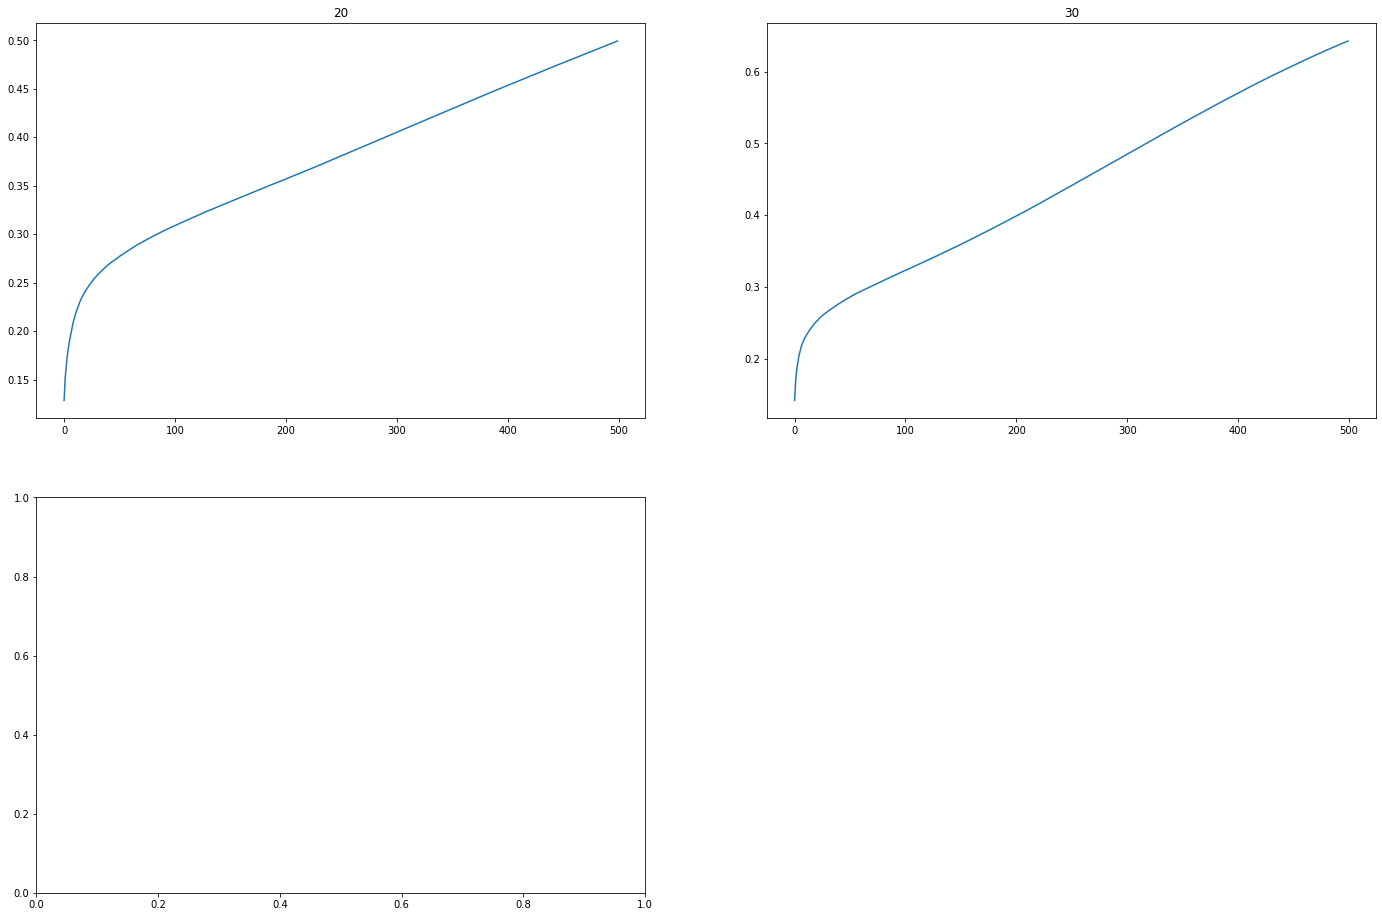

In [14]:
clay=[20,30,40,80]
plt.figure(figsize=(12*2,8*2))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(range(len(train[0])),train[i])
    plt.title(str(clay[i]))
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

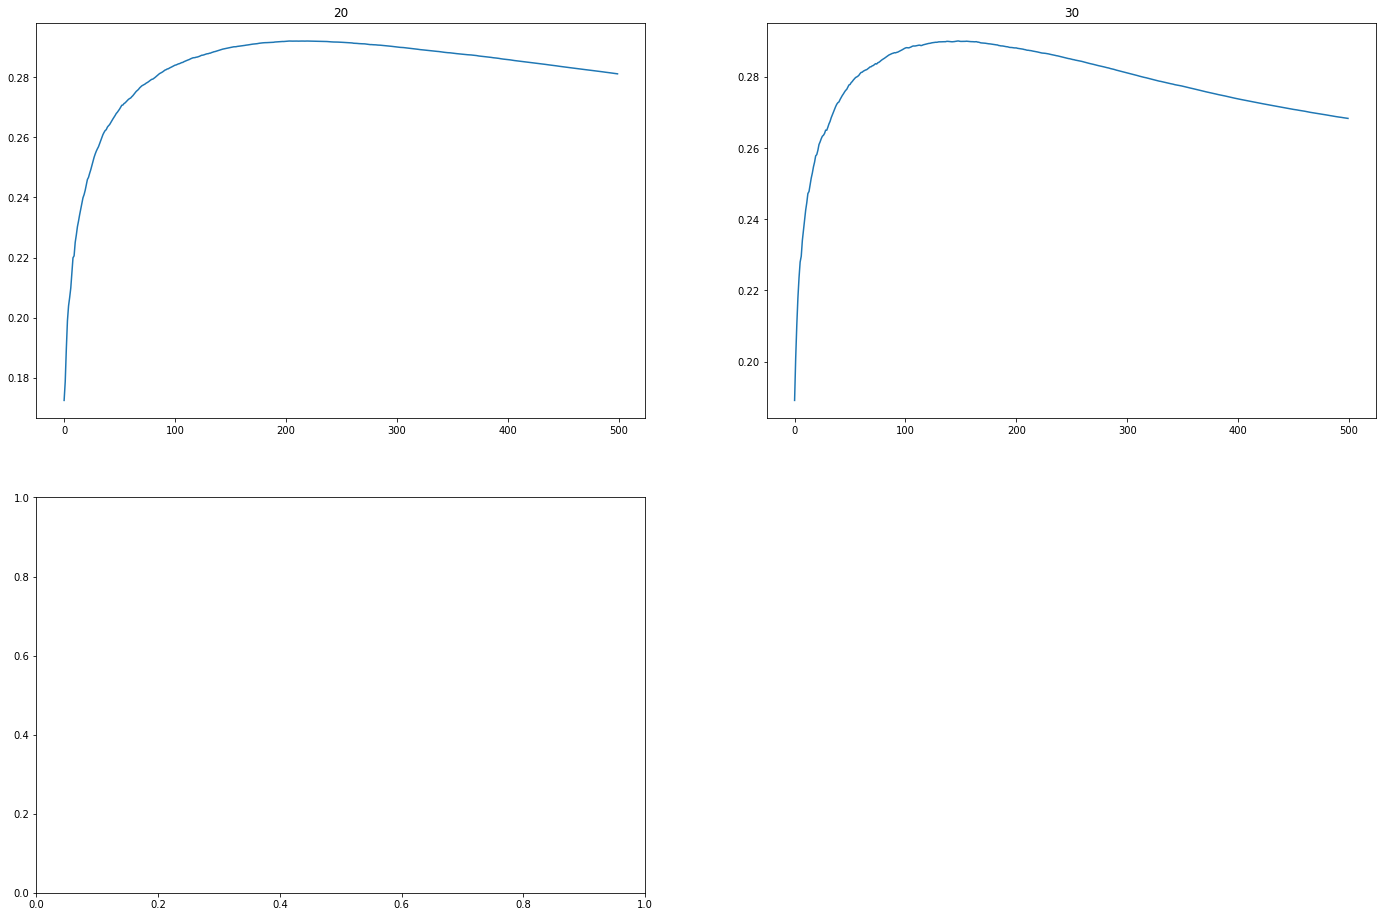

In [16]:
clay=[20,30,40,80]
plt.figure(figsize=(12*2,8*2))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(range(len(train[0])),test[i])
    plt.title(str(clay[i]))
plt.show()